<a href="https://colab.research.google.com/github/NavneetRajSingh/Bharat-Intern-task/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [119]:
data=pd.read_csv("/content/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


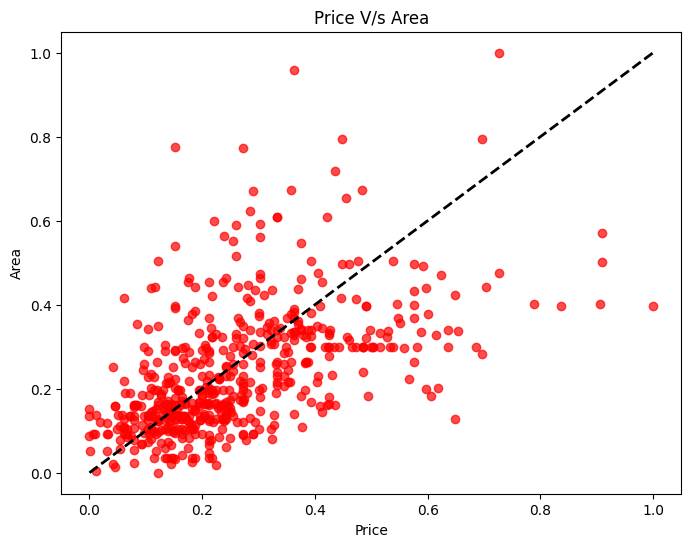

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(data["price"], data['area'], color='red', alpha=0.7)
plt.plot([min(data["price"]), max(data["price"])], [min(data["area"]), max(data["area"])], color='black', linestyle='--', lw=2)
plt.title("Price V/s Area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

In [120]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [121]:
data["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [122]:
data["furnishingstatus"]=data["furnishingstatus"].map({"furnished":1,"semi-furnished":0.5,"unfurnished":0})
data["furnishingstatus"]

0      1.0
1      1.0
2      0.5
3      1.0
4      1.0
      ... 
540    0.0
541    0.5
542    0.0
543    1.0
544    0.0
Name: furnishingstatus, Length: 545, dtype: float64

In [123]:
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i in columns_to_convert:
  data[i]=data[i].map({"yes":1,"no":0})

In [124]:
cols=["price","area","bedrooms","bathrooms","stories", 'parking']
sc=MinMaxScaler()
for i in cols:
  data[i]=sc.fit_transform(data[i].array.reshape(-1,1))

In [125]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,0.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1.0


In [126]:
data.shape

(545, 13)

In [127]:
X=data.iloc[:,1:]
y=data.iloc[:,0]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,0.0
541,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0.5
542,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0.0
543,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1.0


In [128]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(381, 12)
(164, 12)


In [129]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

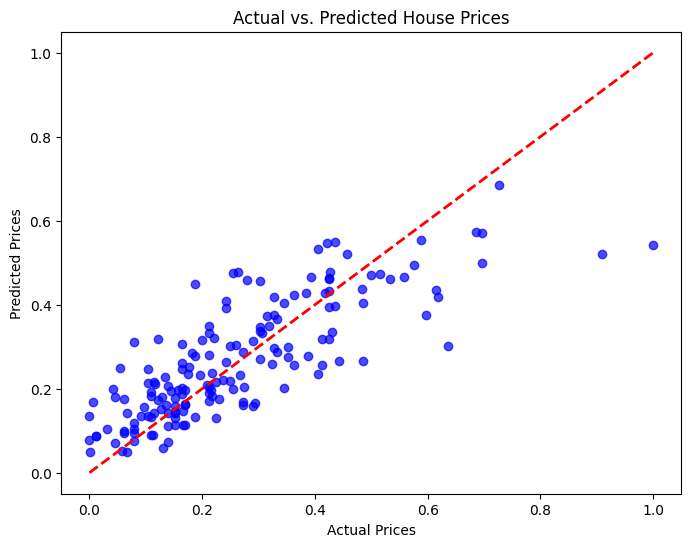

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [131]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.08013364054681005
MSE: 0.011506888989547043
RMSE: 0.10727016821813529
